In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("kepler_Dataset.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [4]:
df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [5]:
df["koi_disposition"].value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

In [6]:
df=df[df["koi_disposition"]!="CANDIDATE"]
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,9557,8258160,K03870.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [7]:
percentageofmissing=df.isnull().sum()[df.isnull().sum() >0]*100 / 9564
filling_column=percentageofmissing
fill_column=filling_column.keys()
fill_column

Index(['kepler_name', 'koi_score', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
       'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad',
       'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1',
       'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2',
       'koi_kepmag'],
      dtype='object')

In [8]:
percentageofmissing

kepler_name          52.509410
koi_score            11.072773
koi_period_err1       3.941865
koi_period_err2       3.941865
koi_time0bk_err1      3.941865
koi_time0bk_err2      3.941865
koi_impact            3.136763
koi_impact_err1       3.941865
koi_impact_err2       3.941865
koi_duration_err1     3.941865
koi_duration_err2     3.941865
koi_depth             3.136763
koi_depth_err1        3.941865
koi_depth_err2        3.941865
koi_prad              3.136763
koi_prad_err1         3.136763
koi_prad_err2         3.136763
koi_teq               3.136763
koi_teq_err1         76.495190
koi_teq_err2         76.495190
koi_insol             2.708072
koi_insol_err1        2.708072
koi_insol_err2        2.708072
koi_model_snr         3.136763
koi_tce_plnt_num      2.917189
koi_tce_delivname     2.917189
koi_steff             3.136763
koi_steff_err1        4.150983
koi_steff_err2        4.307821
koi_slogg             3.136763
koi_slogg_err1        4.150983
koi_slogg_err2        4.150983
koi_srad

In [9]:
for col in fill_column:
    if df[col].dtype=='float64':
        df[col]=df[col].fillna(df[col].median())
    else:
        df[col]=df[col].fillna(df[col].mode()[0])

C:\Users\kirti\AppData\Local\Temp\ipykernel_16760\2512237772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mode()[0])
C:\Users\kirti\AppData\Local\Temp\ipykernel_16760\2512237772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].median())


In [10]:
df=df.drop(["kepler_name","koi_teq_err1","koi_teq_err2"],axis=1)

In [11]:
df.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [12]:
df.isnull().sum()

rowid                0
kepid                0
kepoi_name           0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_er

In [13]:
df.head()

,rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [14]:
df.shape

(7316, 47)

In [15]:
dfint=df[df.select_dtypes(include=["int64","float64"]).columns]
dfint.corr()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,1.000000,0.003026,-0.571320,0.380826,0.189912,0.055016,0.089992,0.225062,0.166510,-0.166510,...,-0.234671,-0.161424,0.148238,-0.169822,0.068800,0.098777,-0.067018,0.060340,-0.000628,-0.121363
kepid,0.003026,1.000000,0.113696,-0.034334,-0.052950,-0.111761,-0.046792,0.012489,0.010932,-0.010932,...,0.009521,0.055530,-0.020707,-0.019963,-0.027782,-0.030993,0.022481,0.005400,0.993661,0.017249
koi_score,-0.571320,0.113696,1.000000,-0.365557,-0.433233,-0.388749,-0.295388,-0.177950,-0.140239,0.140239,...,0.361426,0.150840,-0.150137,0.293806,-0.074036,-0.129263,0.075377,-0.169243,0.113898,0.051666
koi_fpflag_nt,0.380826,-0.034334,-0.365557,1.000000,-0.360742,-0.100954,-0.029186,0.503624,0.372834,-0.372834,...,-0.146605,-0.108461,0.042593,-0.190269,0.027888,0.078485,-0.034779,-0.001905,-0.039147,-0.112113
koi_fpflag_ss,0.189912,-0.052950,-0.433233,-0.360742,1.000000,0.078709,0.044723,-0.182229,-0.145684,0.145684,...,-0.170703,-0.053571,0.124743,-0.058519,0.035529,0.034478,-0.030588,0.092310,-0.051522,0.036680
koi_fpflag_co,0.055016,-0.111761,-0.388749,-0.100954,0.078709,1.000000,0.498929,-0.186387,-0.095654,0.095654,...,-0.104878,-0.009444,-0.020528,-0.062186,0.040518,0.027322,-0.028048,0.176092,-0.109730,0.084677
koi_fpflag_ec,0.089992,-0.046792,-0.295388,-0.029186,0.044723,0.498929,1.000000,-0.159116,-0.087859,0.087859,...,-0.071239,0.004470,-0.006787,-0.047474,0.020457,0.025493,-0.008706,0.074585,-0.047863,0.051151
koi_period,0.225062,0.012489,-0.177950,0.503624,-0.182229,-0.186387,-0.159116,1.000000,0.601926,-0.601926,...,-0.025718,-0.035060,-0.015194,-0.180906,0.002570,0.026056,0.001029,-0.065153,0.010905,-0.038482
koi_period_err1,0.166510,0.010932,-0.140239,0.372834,-0.145684,-0.095654,-0.087859,0.601926,1.000000,-1.000000,...,-0.048084,-0.002339,0.005470,-0.194426,-0.005217,0.023594,0.003795,-0.040458,0.009317,-0.023981
koi_period_err2,-0.166510,-0.010932,0.140239,-0.372834,0.145684,0.095654,0.087859,-0.601926,-1.000000,1.000000,...,0.048084,0.002339,-0.005470,0.194426,0.005217,-0.023594,-0.003795,0.040458,-0.009317,0.023981


In [16]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition',
       'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [17]:
df['koi_disposition_int']=df['koi_disposition'].map({'CONFIRMED':1,'FALSE POSITIVE':0})

In [18]:
df['koi_disposition_int']

0       1
1       1
2       0
3       0
4       1
       ..
9556    0
9559    0
9560    0
9562    0
9563    0
Name: koi_disposition_int, Length: 7316, dtype: int64

In [19]:
df=df.drop(["koi_disposition"],axis=1)

In [20]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'koi_disposition_int'],
      dtype='object')

In [21]:
df.head()

,rowid,kepid,kepoi_name,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_int
0,1,10797460,K00752.01,CANDIDATE,1.000,0,0,0,0,9.488036,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,2,10797460,K00752.02,CANDIDATE,0.969,0,0,0,0,54.418383,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,3,10811496,K00753.01,FALSE POSITIVE,0.000,0,1,0,0,19.899140,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
3,4,10848459,K00754.01,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,5,10854555,K00755.01,CANDIDATE,1.000,0,0,0,0,2.525592,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


In [22]:
koi=df["koi_pdisposition"]=="CANDIDATE"
koi.value_counts()

koi_pdisposition
False    5068
True     2248
Name: count, dtype: int64

In [23]:
df.dtypes.value_counts()

float64    37
int64       7
object      3
Name: count, dtype: int64

In [24]:
df.select_dtypes("object")

,kepoi_name,koi_pdisposition,koi_tce_delivname
0,K00752.01,CANDIDATE,q1_q17_dr25_tce
1,K00752.02,CANDIDATE,q1_q17_dr25_tce
2,K00753.01,FALSE POSITIVE,q1_q17_dr25_tce
3,K00754.01,FALSE POSITIVE,q1_q17_dr25_tce
4,K00755.01,CANDIDATE,q1_q17_dr25_tce
...,...,...,...
9556,K03870.01,FALSE POSITIVE,q1_q17_dr25_tce
9559,K07984.01,FALSE POSITIVE,q1_q17_dr25_tce
9560,K07985.01,FALSE POSITIVE,q1_q17_dr25_tce
9562,K07987.01,FALSE POSITIVE,q1_q17_dr25_tce


In [25]:
df=df.drop("kepoi_name",axis=1)

In [26]:
df.columns

Index(['rowid', 'kepid', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'koi_disposition_int'],
      dtype='object')

In [27]:
df["koi_tce_delivname"].value_counts()

koi_tce_delivname
q1_q17_dr25_tce    6536
q1_q16_tce          561
q1_q17_dr24_tce     219
Name: count, dtype: int64

In [28]:
##Checking Duplicate values
df.duplicated().sum()

0

In [29]:
##Checking for garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*****"*10)

koi_pdisposition
FALSE POSITIVE    5068
CANDIDATE         2248
Name: count, dtype: int64
**************************************************
koi_tce_delivname
q1_q17_dr25_tce    6536
q1_q16_tce          561
q1_q17_dr24_tce     219
Name: count, dtype: int64
**************************************************


In [30]:
df["koi_pdisposition_int"]=df["koi_pdisposition"].map({"CANDIDATE":1,"FALSE POSITIVE":0})
df.drop("koi_pdisposition",axis=1,inplace=True)

In [31]:
##Using One-Hot Encoding on koi_tce_delivname
df=pd.get_dummies(df,columns=["koi_tce_delivname"],drop_first=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rowid                              7316 non-null   int64  
 1   kepid                              7316 non-null   int64  
 2   koi_score                          7316 non-null   float64
 3   koi_fpflag_nt                      7316 non-null   int64  
 4   koi_fpflag_ss                      7316 non-null   int64  
 5   koi_fpflag_co                      7316 non-null   int64  
 6   koi_fpflag_ec                      7316 non-null   int64  
 7   koi_period                         7316 non-null   float64
 8   koi_period_err1                    7316 non-null   float64
 9   koi_period_err2                    7316 non-null   float64
 10  koi_time0bk                        7316 non-null   float64
 11  koi_time0bk_err1                   7316 non-null   float64
 1

In [33]:
df["koi_tce_delivname_q1_q17_dr24_tce"]=df["koi_tce_delivname_q1_q17_dr24_tce"].map({True:1,False:0})
df["koi_tce_delivname_q1_q17_dr25_tce"]=df["koi_tce_delivname_q1_q17_dr25_tce"].map({True:1,False:0})

In [34]:
df[["koi_tce_delivname_q1_q17_dr24_tce","koi_tce_delivname_q1_q17_dr25_tce"]].value_counts()

koi_tce_delivname_q1_q17_dr24_tce  koi_tce_delivname_q1_q17_dr25_tce
0                                  1                                    6536
                                   0                                     561
1                                  0                                     219
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rowid                              7316 non-null   int64  
 1   kepid                              7316 non-null   int64  
 2   koi_score                          7316 non-null   float64
 3   koi_fpflag_nt                      7316 non-null   int64  
 4   koi_fpflag_ss                      7316 non-null   int64  
 5   koi_fpflag_co                      7316 non-null   int64  
 6   koi_fpflag_ec                      7316 non-null   int64  
 7   koi_period                         7316 non-null   float64
 8   koi_period_err1                    7316 non-null   float64
 9   koi_period_err2                    7316 non-null   float64
 10  koi_time0bk                        7316 non-null   float64
 11  koi_time0bk_err1                   7316 non-null   float64
 1

In [36]:
df.corr()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_int,koi_pdisposition_int,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
rowid,1.000000,0.003026,-0.571320,0.380826,0.189912,0.055016,0.089992,0.225062,0.166510,-0.166510,...,0.068800,0.098777,-0.067018,0.060340,-0.000628,-0.121363,-0.582788,-0.578114,0.156080,-0.246711
kepid,0.003026,1.000000,0.113696,-0.034334,-0.052950,-0.111761,-0.046792,0.012489,0.010932,-0.010932,...,-0.027782,-0.030993,0.022481,0.005400,0.993661,0.017249,0.112397,0.112872,-0.031401,0.021971
koi_score,-0.571320,0.113696,1.000000,-0.365557,-0.433233,-0.388749,-0.295388,-0.177950,-0.140239,0.140239,...,-0.074036,-0.129263,0.075377,-0.169243,0.113898,0.051666,0.974608,0.986426,-0.120276,0.236530
koi_fpflag_nt,0.380826,-0.034334,-0.365557,1.000000,-0.360742,-0.100954,-0.029186,0.503624,0.372834,-0.372834,...,0.027888,0.078485,-0.034779,-0.001905,-0.039147,-0.112113,-0.371595,-0.380456,0.117549,-0.471058
koi_fpflag_ss,0.189912,-0.052950,-0.433233,-0.360742,1.000000,0.078709,0.044723,-0.182229,-0.145684,0.145684,...,0.035529,0.034478,-0.030588,0.092310,-0.051522,0.036680,-0.423874,-0.427856,-0.033916,0.171079
koi_fpflag_co,0.055016,-0.111761,-0.388749,-0.100954,0.078709,1.000000,0.498929,-0.186387,-0.095654,0.095654,...,0.040518,0.027322,-0.028048,0.176092,-0.109730,0.084677,-0.391005,-0.389426,0.005895,0.109500
koi_fpflag_ec,0.089992,-0.046792,-0.295388,-0.029186,0.044723,0.498929,1.000000,-0.159116,-0.087859,0.087859,...,0.020457,0.025493,-0.008706,0.074585,-0.047863,0.051151,-0.290677,-0.287328,0.027865,0.082064
koi_period,0.225062,0.012489,-0.177950,0.503624,-0.182229,-0.186387,-0.159116,1.000000,0.601926,-0.601926,...,0.002570,0.026056,0.001029,-0.065153,0.010905,-0.038482,-0.177199,-0.181224,0.045170,-0.436209
koi_period_err1,0.166510,0.010932,-0.140239,0.372834,-0.145684,-0.095654,-0.087859,0.601926,1.000000,-1.000000,...,-0.005217,0.023594,0.003795,-0.040458,0.009317,-0.023981,-0.146509,-0.144855,0.036646,-0.250578
koi_period_err2,-0.166510,-0.010932,0.140239,-0.372834,0.145684,0.095654,0.087859,-0.601926,-1.000000,1.000000,...,0.005217,-0.023594,-0.003795,0.040458,-0.009317,0.023981,0.146509,0.144855,-0.036646,0.250578


In [37]:
# y=df["koi_disposition_int"].copy()
# y.value_counts().plot(kind="bar",title="Target Class Distribution")
# plt.show()

In [38]:
# x=df.drop(["koi_disposition_int"],axis=1).copy()
# x.describe().T

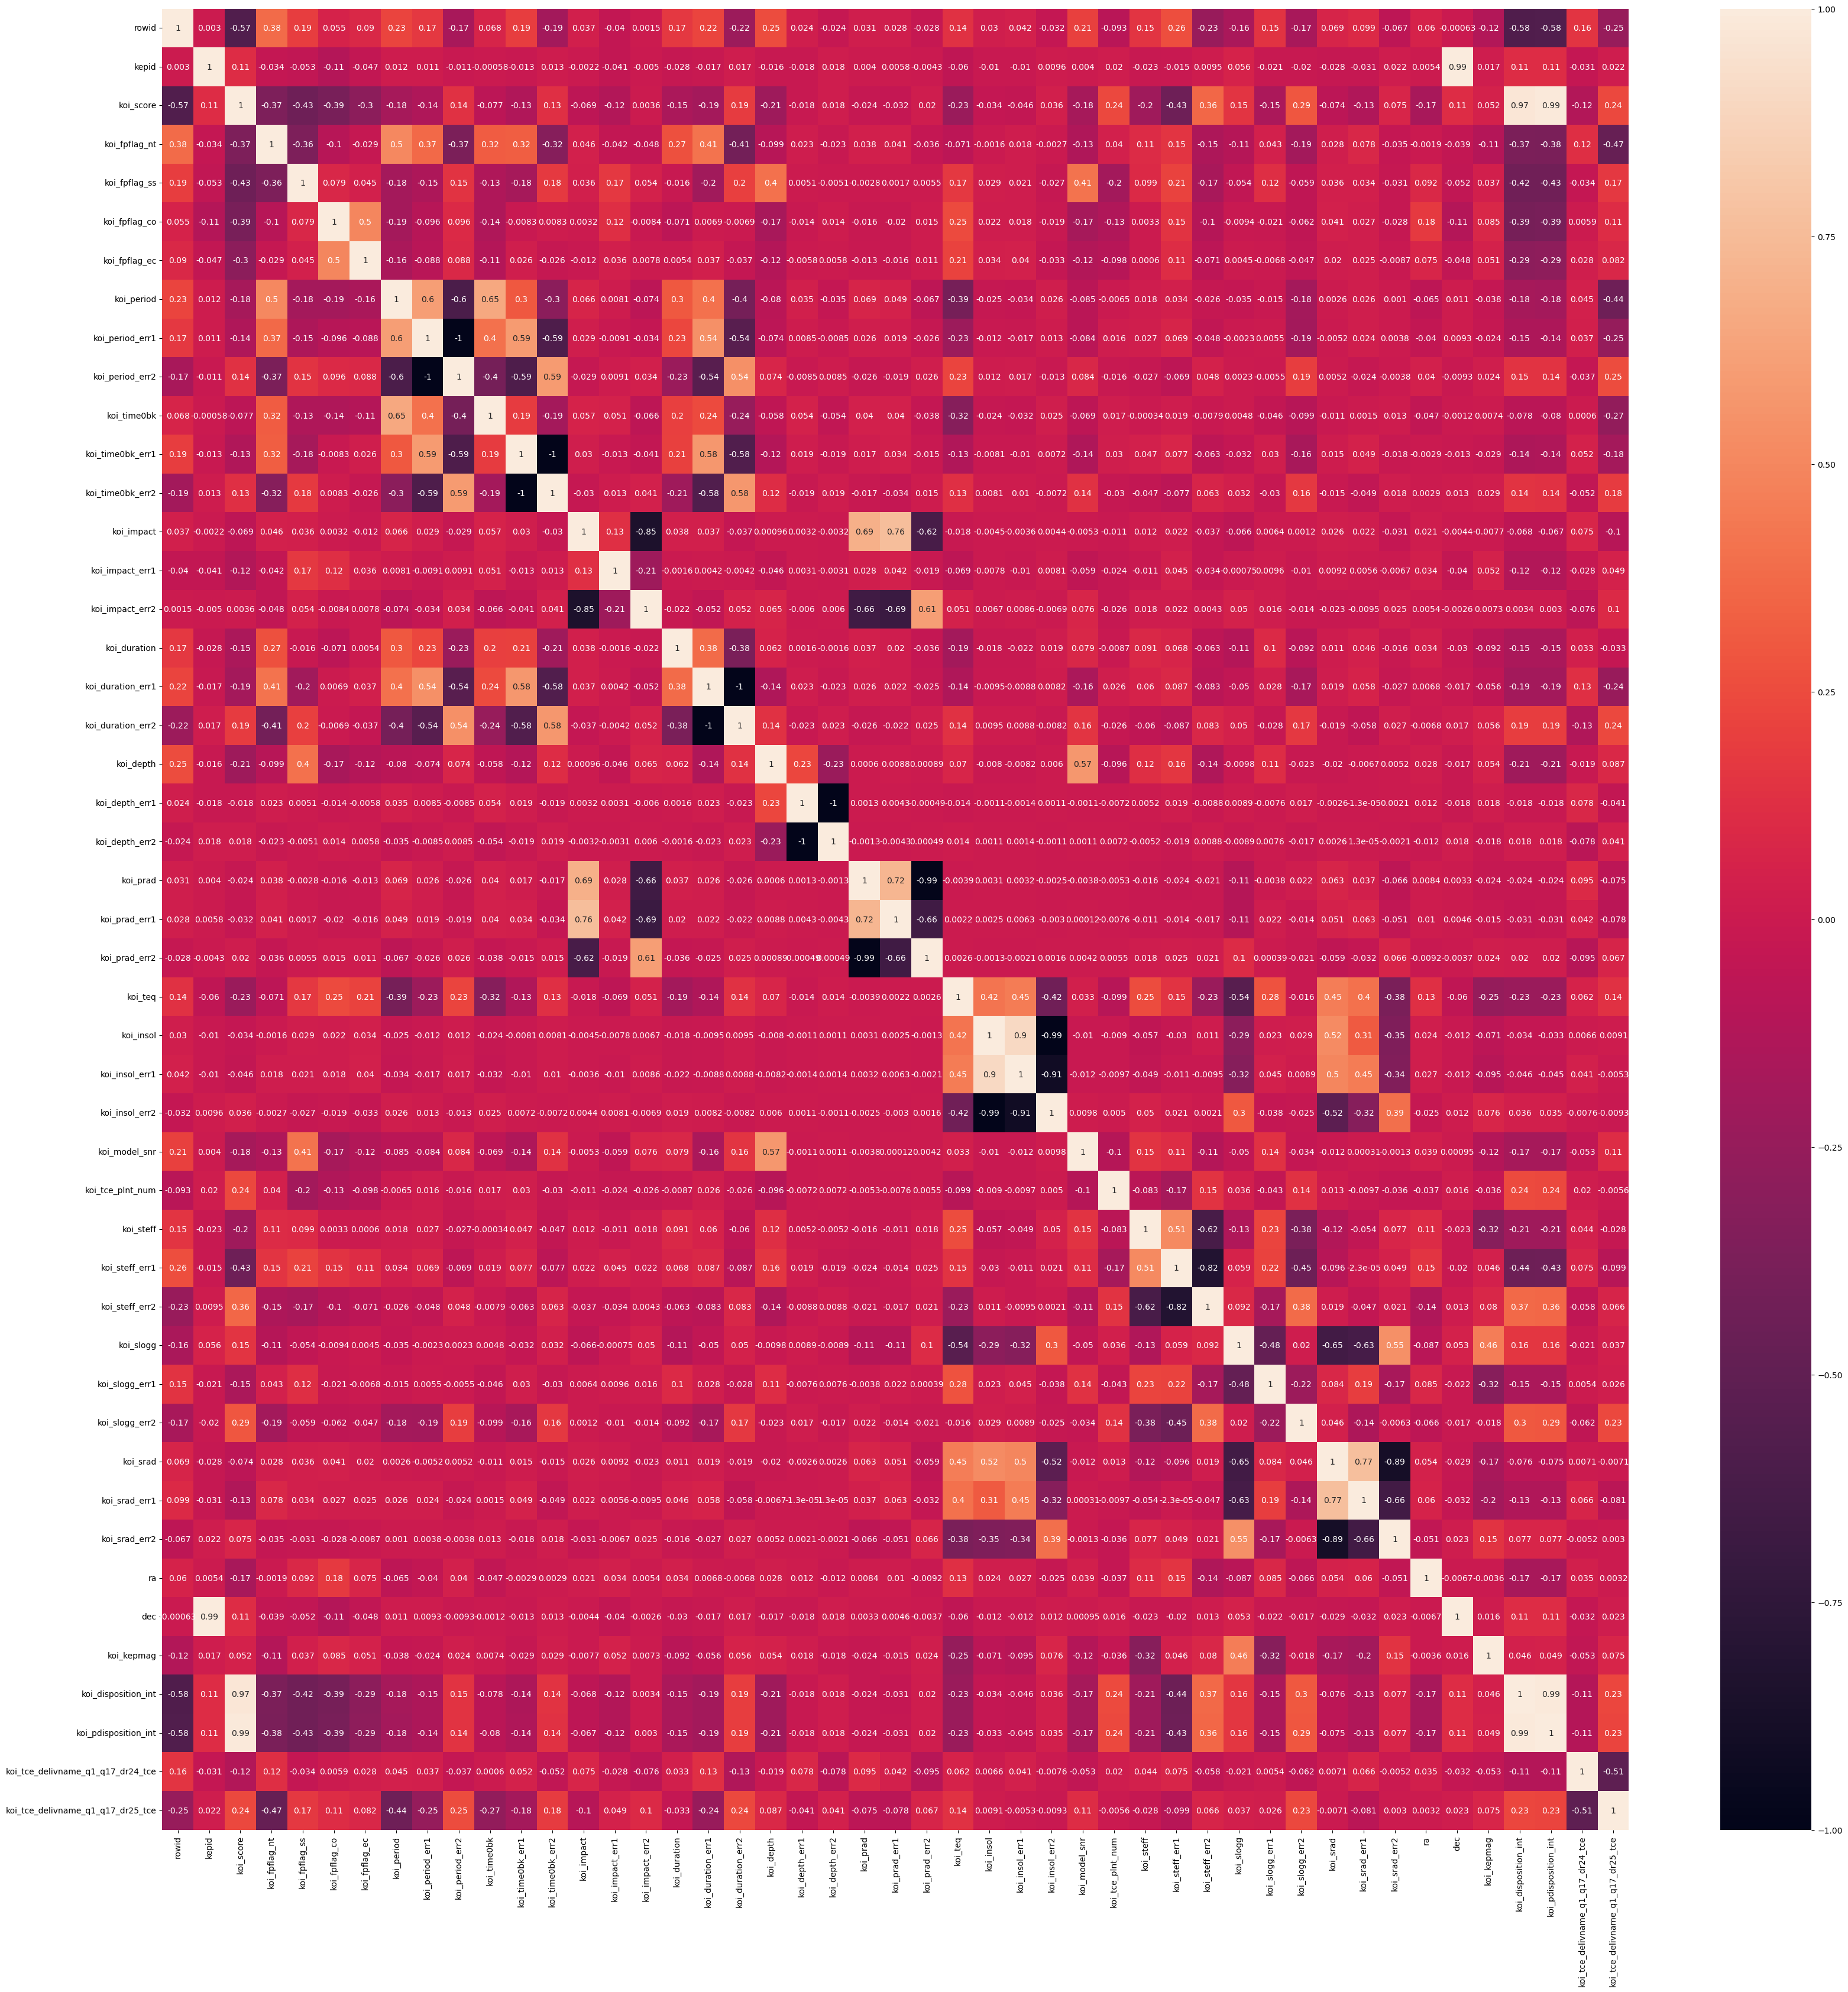

In [39]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)
plt.show()

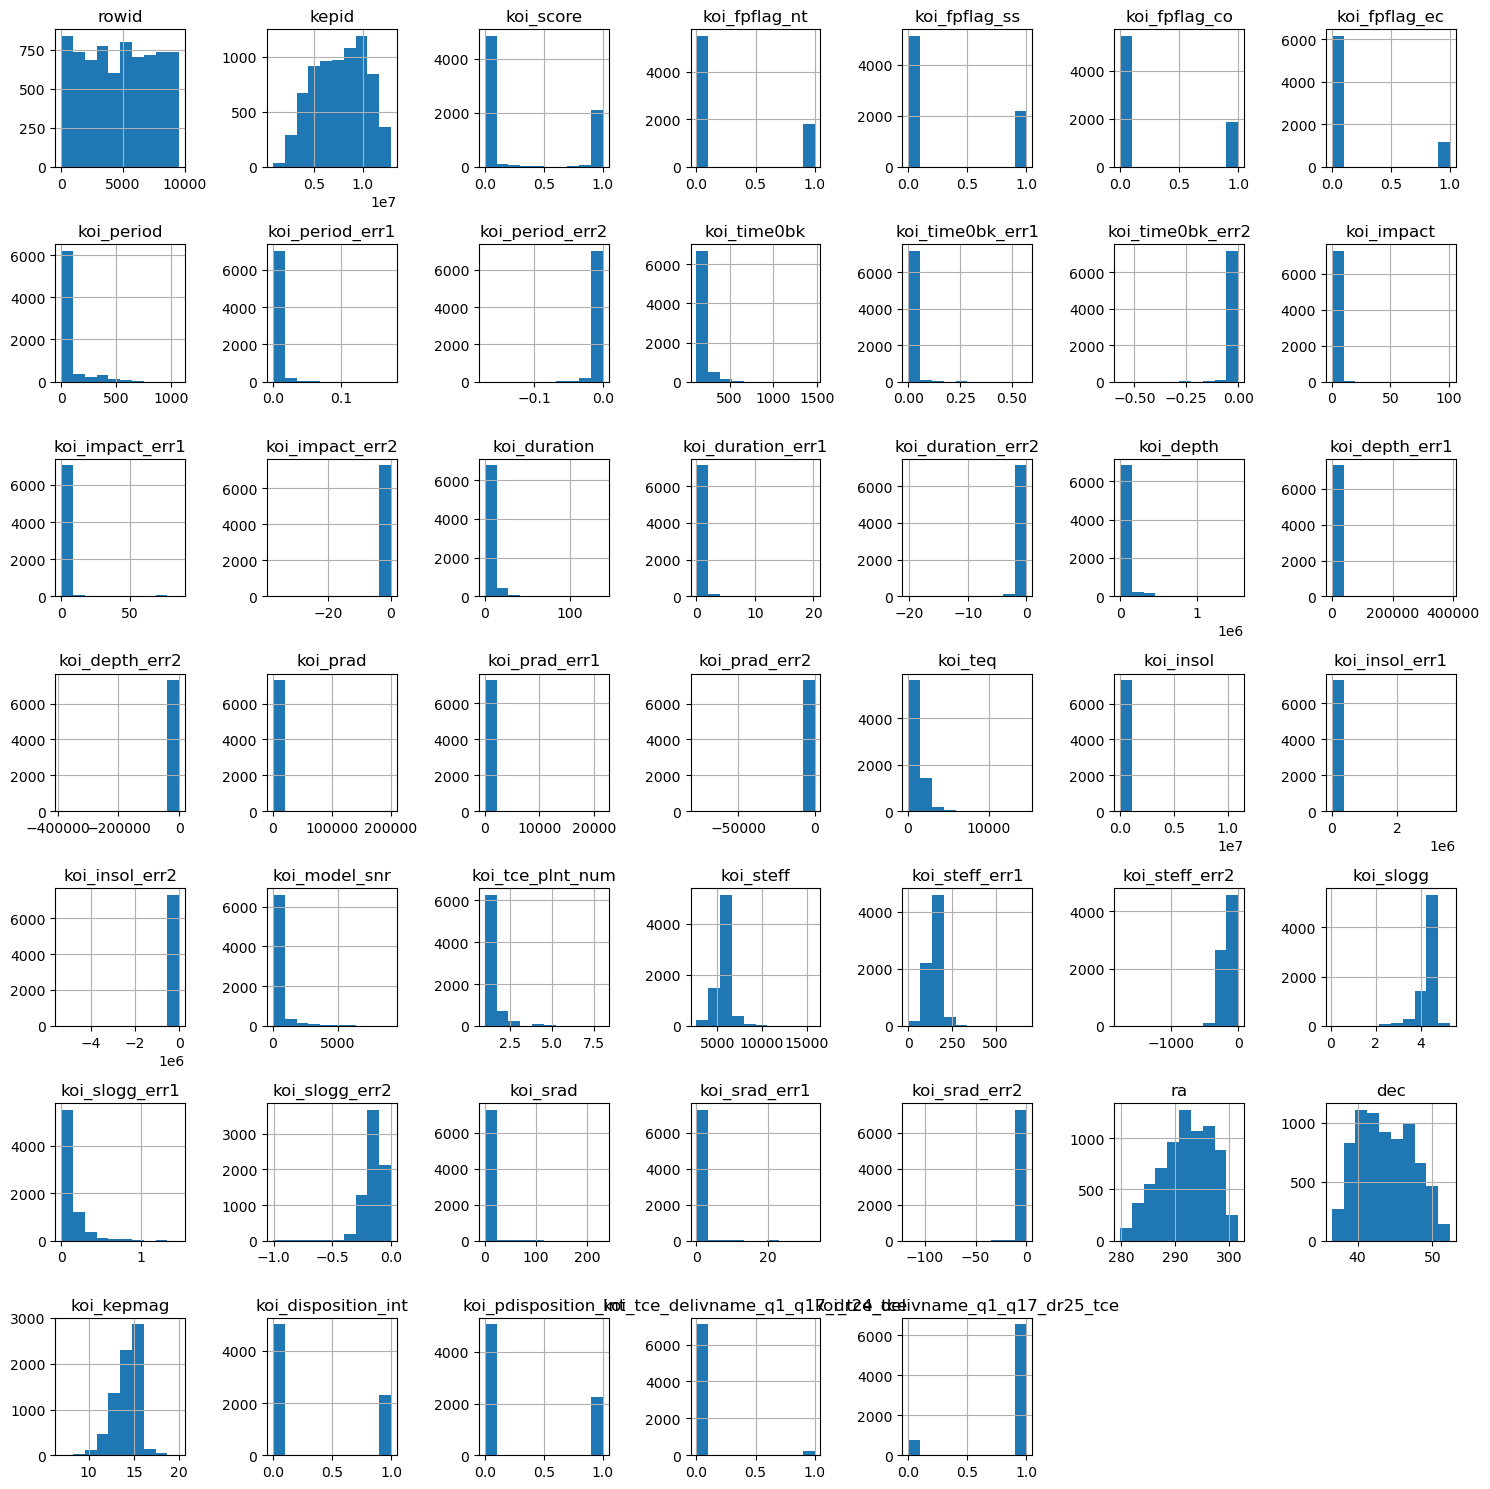

In [40]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [41]:
df=df.drop(["rowid","kepid",'koi_period_err1',
       'koi_period_err2','koi_time0bk_err1',
       'koi_time0bk_err2','koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2',
       'koi_depth_err1', 'koi_depth_err2','koi_prad_err1',
       'koi_prad_err2', 'koi_insol_err1',
       'koi_insol_err2','koi_srad_err1', 'koi_srad_err2'],axis=1)

In [42]:
df.columns

Index(['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'ra', 'dec', 'koi_kepmag', 'koi_disposition_int',
       'koi_pdisposition_int', 'koi_tce_delivname_q1_q17_dr24_tce',
       'koi_tce_delivname_q1_q17_dr25_tce'],
      dtype='object')

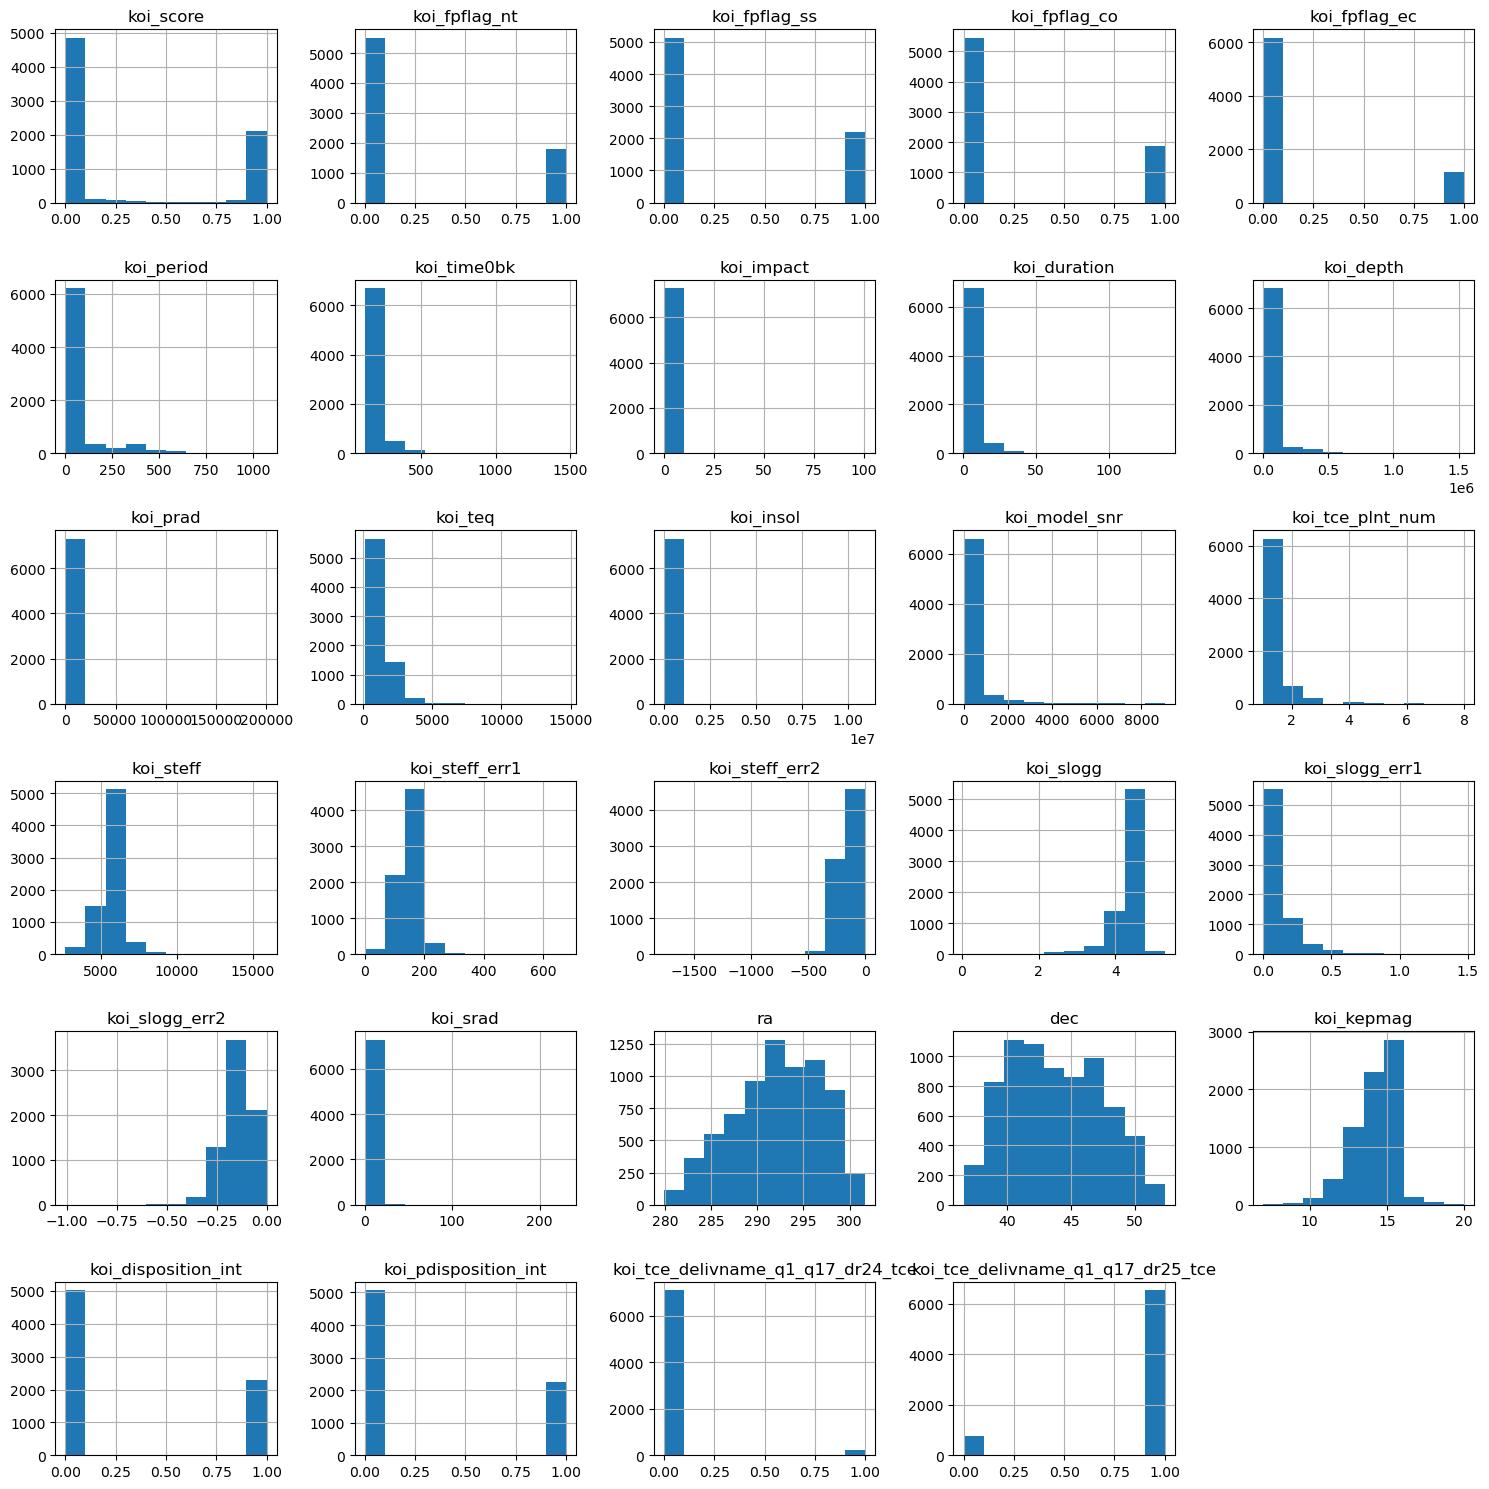

In [43]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [44]:
##Too weak features-- koi_srad
df[["koi_srad","koi_disposition_int"]].corr()

,koi_srad,koi_disposition_int
koi_srad,1.000000,-0.075704
koi_disposition_int,-0.075704,1.000000


In [45]:
##Log Scaling the skewwed features--
for i in ["koi_srad","koi_impact","koi_prad","koi_insol","koi_depth","koi_duration"]:
    df[i]=np.log1p(df[i])


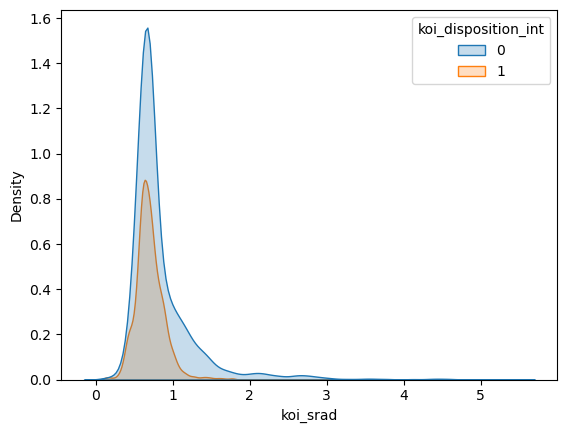

,koi_srad,koi_disposition_int
koi_srad,1.000000,-0.165622
koi_disposition_int,-0.165622,1.000000


In [46]:
sns.kdeplot(data=df,x="koi_srad",hue="koi_disposition_int",fill=True)
plt.show()
df[["koi_srad","koi_disposition_int"]].corr()

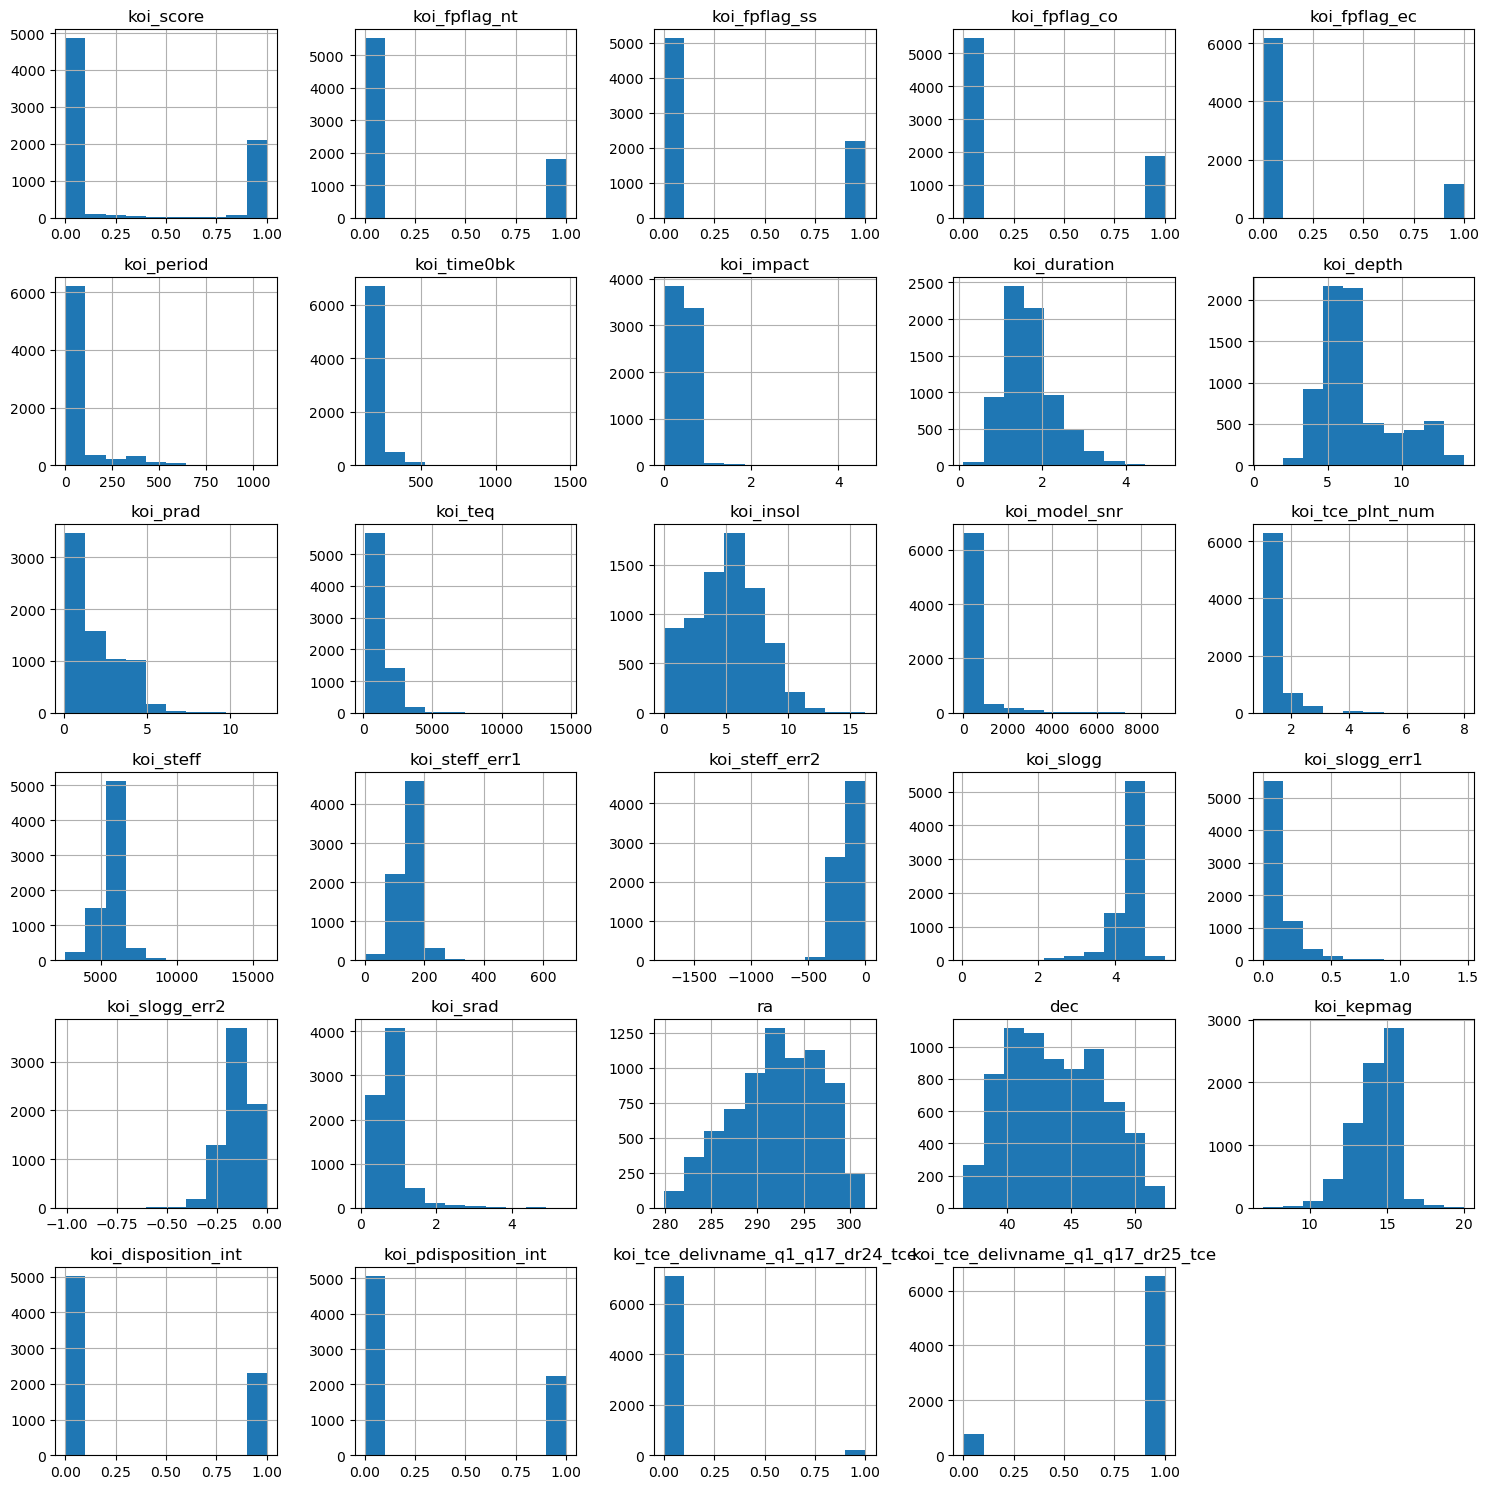

In [47]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [48]:
# df[["koi_model_snr","koi_disposition_int"]].corr()
# df[["koi_model_snr","koi_disposition_int"]].describe().T
df[["koi_model_snr","koi_disposition_int"]].describe().T

,count,mean,std,min,25%,50%,75%,max
koi_model_snr,7316.0,314.501381,875.161267,0.0,15.2,30.75,111.425,9054.7
koi_disposition_int,7316.0,0.313423,0.463916,0.0,0.0,0.00,1.000,1.0


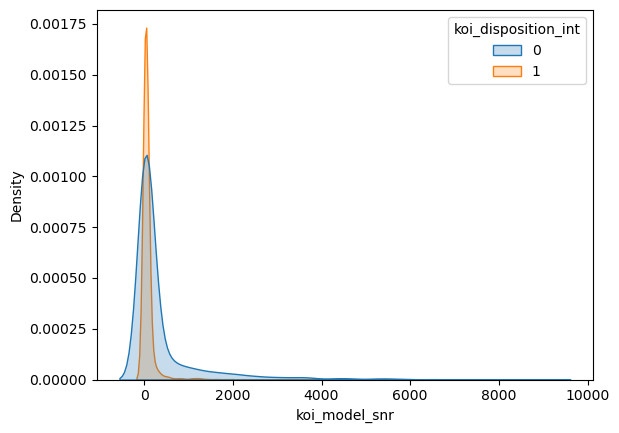

In [49]:
sns.kdeplot(df,x="koi_model_snr",hue="koi_disposition_int",fill=True)
plt.show()

In [50]:
df.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag,koi_disposition_int,koi_pdisposition_int,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
0,1.000,0,0,0,0,9.488036,170.538750,0.136278,1.375613,6.424545,...,0.064,-0.096,0.655964,291.93423,48.141651,15.347,1,1,0,1
1,0.969,0,0,0,0,54.418383,162.513840,0.461215,1.706020,6.775138,...,0.064,-0.096,0.655964,291.93423,48.141651,15.347,1,1,0,1
2,0.000,0,1,0,0,19.899140,175.850252,0.677526,1.023242,9.290075,...,0.044,-0.176,0.624868,297.00482,48.134129,15.436,0,0,0,1
3,0.000,0,1,0,0,1.736952,170.307565,0.822420,1.225659,8.997172,...,0.053,-0.168,0.582774,285.53461,48.285210,15.597,0,0,0,1
4,1.000,0,0,0,0,2.525592,171.595550,0.531216,0.976256,6.404071,...,0.070,-0.210,0.715887,288.75488,48.226200,15.509,1,1,0,1


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   koi_score                          7316 non-null   float64
 1   koi_fpflag_nt                      7316 non-null   int64  
 2   koi_fpflag_ss                      7316 non-null   int64  
 3   koi_fpflag_co                      7316 non-null   int64  
 4   koi_fpflag_ec                      7316 non-null   int64  
 5   koi_period                         7316 non-null   float64
 6   koi_time0bk                        7316 non-null   float64
 7   koi_impact                         7316 non-null   float64
 8   koi_duration                       7316 non-null   float64
 9   koi_depth                          7316 non-null   float64
 10  koi_prad                           7316 non-null   float64
 11  koi_teq                            7316 non-null   float64
 1

In [54]:
## Separating X (Independent Features) and Y (Target Feature)
Y=df["koi_disposition_int"].copy()
X=df.drop(["koi_disposition_int"],axis=1).copy()

In [57]:
##Independent Feature --X
X.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag,koi_pdisposition_int,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
0,1.000,0,0,0,0,9.488036,170.538750,0.136278,1.375613,6.424545,...,4.467,0.064,-0.096,0.655964,291.93423,48.141651,15.347,1,0,1
1,0.969,0,0,0,0,54.418383,162.513840,0.461215,1.706020,6.775138,...,4.467,0.064,-0.096,0.655964,291.93423,48.141651,15.347,1,0,1
2,0.000,0,1,0,0,19.899140,175.850252,0.677526,1.023242,9.290075,...,4.544,0.044,-0.176,0.624868,297.00482,48.134129,15.436,0,0,1
3,0.000,0,1,0,0,1.736952,170.307565,0.822420,1.225659,8.997172,...,4.564,0.053,-0.168,0.582774,285.53461,48.285210,15.597,0,0,1
4,1.000,0,0,0,0,2.525592,171.595550,0.531216,0.976256,6.404071,...,4.438,0.070,-0.210,0.715887,288.75488,48.226200,15.509,1,0,1


In [58]:
##Dependent Feature--Y
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: koi_disposition_int, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [61]:
X_train

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag,koi_pdisposition_int,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
4378,0.001,0,0,1,0,0.896283,131.549720,0.162119,0.874218,4.470495,...,4.572,0.040,-0.170,0.597737,296.50925,44.625912,15.248,0,0,1
700,1.000,0,0,0,0,23.584447,145.957980,0.537078,1.880152,6.064250,...,4.152,0.217,-0.093,0.856116,285.42429,47.834610,13.971,1,0,1
3994,0.000,0,1,0,0,71.762363,170.095082,0.050693,3.415593,9.058692,...,3.685,0.712,-0.178,1.339465,292.13428,46.202419,12.045,0,0,1
6573,0.000,1,0,0,0,105.895315,231.444100,0.088926,1.275642,7.113142,...,4.548,0.049,-0.176,0.577175,297.22940,46.616402,15.979,0,0,0
3574,0.147,1,0,0,0,85.112898,171.825400,0.032467,1.253620,6.243778,...,4.485,0.054,-0.216,0.680568,286.46753,38.385971,15.681,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,0.000,1,0,0,0,91.240335,155.723700,0.134181,1.198156,5.333202,...,4.305,0.112,-0.295,0.790728,297.52707,49.404499,13.890,0,0,0
6844,0.000,1,0,1,0,151.577009,194.795800,0.063256,1.278152,6.150390,...,4.106,0.186,-0.288,0.983575,295.91843,51.250118,13.965,0,0,0
7069,0.000,0,1,0,0,21.025447,148.222643,0.682086,2.017853,11.659110,...,3.798,0.328,-0.082,1.234890,298.82739,47.257740,13.079,0,0,1
990,1.000,0,0,0,0,1.219568,133.460233,0.064851,0.943166,6.206374,...,4.625,0.027,-0.059,0.531216,292.32858,49.653542,15.127,1,0,1


In [62]:
X_test

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,ra,dec,koi_kepmag,koi_pdisposition_int,koi_tce_delivname_q1_q17_dr24_tce,koi_tce_delivname_q1_q17_dr25_tce
3252,0.989,0,0,0,0,2.358952,132.689570,0.325700,0.952816,4.554929,...,4.385,0.132,-0.088,0.686123,287.29544,43.279869,14.140,1,0,1
1901,1.000,0,0,0,0,6.312509,132.654418,0.028587,1.320555,7.160069,...,4.696,0.084,-0.056,0.451712,287.89163,39.339130,14.735,1,0,1
8631,0.000,0,1,0,0,13.683693,135.210807,0.085260,1.653462,12.130869,...,4.566,0.090,-0.060,0.535323,291.93640,47.309689,11.544,0,0,1
3554,0.000,0,0,1,0,6.971069,174.703050,0.043059,1.591783,6.117657,...,4.493,0.048,-0.204,0.684611,288.98038,46.954060,15.040,0,0,1
4899,0.000,0,0,1,0,16.050546,141.734080,0.126633,1.428156,4.558079,...,4.563,0.014,-0.068,0.616806,288.56152,46.536049,13.136,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,0.000,0,1,0,0,1.714415,131.866145,0.779783,1.820034,11.609426,...,4.126,0.225,-0.184,0.960499,291.69095,39.425442,13.309,0,0,1
6378,0.000,1,0,0,0,30.977115,145.647500,0.411580,1.432223,4.836282,...,3.453,0.248,-0.284,1.565277,283.58612,47.633739,13.785,0,0,0
3542,0.994,0,0,0,0,6.790121,138.088199,0.396088,1.952134,7.742098,...,3.954,0.020,-0.020,1.098946,287.70883,47.333050,12.128,1,0,1
8459,0.000,0,1,0,0,1.827559,132.265540,0.088926,1.745380,12.659315,...,3.854,0.544,-0.136,1.123955,301.30350,44.999660,13.661,0,0,1


In [63]:
Y_train

4378    0
700     1
3994    0
6573    0
3574    0
       ..
6781    0
6844    0
7069    0
990     1
9498    0
Name: koi_disposition_int, Length: 5121, dtype: int64

In [64]:
Y_test

3252    1
1901    1
8631    0
3554    0
4899    1
       ..
6005    0
6378    0
3542    1
8459    0
4476    0
Name: koi_disposition_int, Length: 2195, dtype: int64

In [73]:
##StandardScaler- Transforming X_train
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
X_train_scaled=standardscaler.fit_transform(X_train)

In [75]:
X_train_scaled

array([[-0.6725791 , -0.5778764 , -0.65517115, ..., -0.65395369,
        -0.16887801,  0.34226685],
       [ 1.56148742, -0.5778764 , -0.65517115, ...,  1.52916028,
        -0.16887801,  0.34226685],
       [-0.6748154 , -0.5778764 ,  1.52631874, ..., -0.65395369,
        -0.16887801,  0.34226685],
       ...,
       [-0.6748154 , -0.5778764 ,  1.52631874, ..., -0.65395369,
        -0.16887801,  0.34226685],
       [ 1.56148742, -0.5778764 , -0.65517115, ...,  1.52916028,
        -0.16887801,  0.34226685],
       [-0.6748154 ,  1.73047386, -0.65517115, ..., -0.65395369,
        -0.16887801,  0.34226685]])

In [70]:
##Saving Scaling model in pickle file --Use it while doing backend--
import pickle
with open("scalerpickle.pkl","wb") as f:
    pickle.dump(standardscaler,f)

In [78]:
##Training Model on X_Train and Y_train
from sklearn.ensemble import RandomForestClassifier
forestmodel=RandomForestClassifier(random_state=42)
forestmodel.fit(X_train_scaled,Y_train)

RandomForestClassifier(random_state=42)

In [76]:
##Transforming X_test
with open("scalerpickle.pkl","rb") as f:
    scalerpickle=pickle.load(f)

X_test_scaled=scalerpickle.transform(X_test)

In [77]:
X_test_scaled

array([[ 1.53688809, -0.5778764 , -0.65517115, ...,  1.52916028,
        -0.16887801,  0.34226685],
       [ 1.56148742, -0.5778764 , -0.65517115, ...,  1.52916028,
        -0.16887801,  0.34226685],
       [-0.6748154 , -0.5778764 ,  1.52631874, ..., -0.65395369,
        -0.16887801,  0.34226685],
       ...,
       [ 1.5480696 , -0.5778764 , -0.65517115, ...,  1.52916028,
        -0.16887801,  0.34226685],
       [-0.6748154 , -0.5778764 ,  1.52631874, ..., -0.65395369,
        -0.16887801,  0.34226685],
       [-0.6748154 ,  1.73047386, -0.65517115, ..., -0.65395369,
        -0.16887801,  0.34226685]])

In [88]:
y_pred=forestmodel.predict(X_test_scaled)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
Y_test

3252    1
1901    1
8631    0
3554    0
4899    1
       ..
6005    0
6378    0
3542    1
8459    0
4476    0
Name: koi_disposition_int, Length: 2195, dtype: int64

In [90]:
## Model Performance Metric--
## Testing for accuracy--
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
accuracy

0.9931662870159453

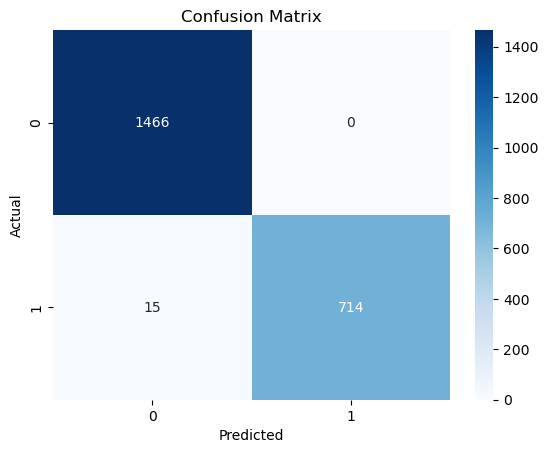

In [99]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
##Classificaiton Report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1466
           1       1.00      0.98      0.99       729

    accuracy                           0.99      2195
   macro avg       0.99      0.99      0.99      2195
weighted avg       0.99      0.99      0.99      2195



In [107]:
##Saving THe Trained Model in the Pickle file--
with open("forestpickle.pkl","wb") as m:
    pickle.dump(forestmodel,m)

In [112]:
X_test_scaled[0]

array([ 1.53688809, -0.5778764 , -0.65517115, -0.58870069, -0.43537   ,
       -0.47239237, -0.49265024, -0.36907574, -1.19620614, -0.94848822,
       -0.9211265 ,  0.16311582,  0.4932231 , -0.34291882,  1.24000505,
       -0.56957504, -1.37240238,  1.36444335,  0.1806047 ,  0.07688506,
        0.67969637, -0.28805324, -1.03375507, -0.14124281, -0.05749805,
        1.52916028, -0.16887801,  0.34226685])

In [114]:
##Predicting with Model pickle file--
with open("forestpickle.pkl","rb") as m:
    forestpickle=pickle.load(m)

forestpickle.predict([X_test_scaled[0]])

array([1], dtype=int64)

In [ ]:
##Done with Machine learning stuff---moving to backend...